#Preprocessing and EDA#


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import requests
from google.colab import drive

drive.mount('/content/gdrive')  # Connect to your Google Drive account

data_dir = '/content/gdrive/MyDrive/audio_data'  # Update with your data directory in Google Drive

file_path="/content/gdrive/MyDrive/birds_india.csv"
data = pd.read_csv(file_path)

data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,429767,Dendrocygna,bicolor,NaN,Fulvous Whistling Duck,Sreekumar Chirukandoth,India,"OMR - Medavakkam Toll Gate (near Chennai), Ka...",12.9011,80.2199,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:08,07:00,2017-08-27,2018-08-08,"['Corvus splendens', 'Tachybaptus ruficollis']",Call of a single bird flying in to join a smal...,yes,no
1,369151,Dendrocygna,javanica,NaN,Lesser Whistling Duck,Peter Boesman,India,"Near Chouldari, South Andaman County, Andaman ...",11.6300,92.6700,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:18,15:00,2017-04-23,2017-05-12,[''],NaN,unknown,unknown
2,369150,Dendrocygna,javanica,NaN,Lesser Whistling Duck,Peter Boesman,India,"Near Chouldari, South Andaman County, Andaman ...",11.6300,92.6700,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:30,15:00,2017-04-23,2017-05-12,[''],NaN,unknown,unknown
3,178554,Dendrocygna,javanica,NaN,Lesser Whistling Duck,Eveny Luis,India,"Goncoi, Aldona,Bardez, Goa",15.5966,73.8729,...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:06,19:17,2014-05-18,2014-05-18,[''],NaN,yes,no
4,472687,Dendrocygna,javanica,NaN,Lesser Whistling Duck,Peter Boesman,India,"Keoladeo National Park, Bharatpur, Rajasthan",27.1593,77.5232,...,//creativecommons.org/licenses/by-nc-nd/4.0/,B,0:27,10:30,2019-04-06,2019-05-10,['Mycteria leucocephala'],Calls of a small group,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13649,548597,Mystery,mystery,NaN,Identity unknown,Niranjan Murthy K R,India,"Mysuru, Mysuru, Karnataka",12.2908,76.5990,...,//creativecommons.org/licenses/by-nc-nd/4.0/,E,1:01,05:30,2020-04-21,2020-04-21,[''],Want to identify the bird with song & also the...,no,no
13650,461580,Mystery,mystery,NaN,Identity unknown,Dr. Ravikumar Dumpala,India,"Nagpur, Nagpur, Maharashtra",21.1279,79.0499,...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:30,17:00,2019-03-12,2019-03-13,[''],"call i heard from canopy of a big tree, one re...",no,unknown
13651,358434,Mystery,mystery,NaN,Identity unknown,BIndyamc,India,"B Jalukie, Peren, Nagaland",25.6321,93.6768,...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:16,03:30,2017-03-10,2017-03-10,[''],Flies in circle late evenings and early mornings,no,no
13652,347185,Mystery,mystery,NaN,Identity unknown,Aravind Amirtharaj,India,"Coonoor, Nilgiris, Tamil Nadu",11.3628,76.7979,...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:27,11:00,2016-12-19,2016-12-19,[''],Its a dense shola forest. this call is heared ...,no,no


In [ ]:
data.columns


Index(['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng',
       'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q', 'length',
       'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen',
       'playback-used'],
      dtype='object')

In [ ]:
df=data.drop(['ssp'], axis=1)


In [ ]:
df2=df.drop(['rmk'],axis=1)
df2.isnull().sum()

id                  0
gen                 0
sp                  0
en                  0
rec                 0
cnt                 0
loc               535
lat               824
lng               824
alt              2303
type                0
url                 0
file              534
file-name         534
sono                0
lic                 0
q                   0
length              0
time                1
date                0
uploaded            0
also                0
bird-seen           0
playback-used       0
dtype: int64

In [ ]:
df2=df2.dropna()

In [ ]:
df2

,id,gen,sp,en,rec,cnt,loc,lat,lng,alt,...,sono,lic,q,length,time,date,uploaded,also,bird-seen,playback-used
0,429767,Dendrocygna,bicolor,Fulvous Whistling Duck,Sreekumar Chirukandoth,India,"OMR - Medavakkam Toll Gate (near Chennai), Ka...",12.9011,80.2199,0,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:08,07:00,2017-08-27,2018-08-08,"['Corvus splendens', 'Tachybaptus ruficollis']",yes,no
3,178554,Dendrocygna,javanica,Lesser Whistling Duck,Eveny Luis,India,"Goncoi, Aldona,Bardez, Goa",15.5966,73.8729,20,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:06,19:17,2014-05-18,2014-05-18,[''],yes,no
6,425093,Dendrocygna,javanica,Lesser Whistling Duck,Sreekumar Chirukandoth,India,"Mallapuzhassery, Pathanamthitta, Kerala",9.3223,76.7047,10,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:28,17:30,2017-10-01,2018-07-15,"['Corvus splendens', 'Orthotomus sutorius', 'A...",yes,no
7,351852,Dendrocygna,javanica,Lesser Whistling Duck,Oscar Campbell,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1660,77.5245,180,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:43,17:00,2016-12-21,2017-01-22,['Mycteria leucocephala'],yes,no
8,276848,Dendrocygna,javanica,Lesser Whistling Duck,Dilip KG,India,"Kalady, Ernakulam, Kerala",10.1691,76.4396,10,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:22,18:00,2015-08-29,2015-08-29,[''],yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13649,548597,Mystery,mystery,Identity unknown,Niranjan Murthy K R,India,"Mysuru, Mysuru, Karnataka",12.2908,76.5990,750,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-nd/4.0/,E,1:01,05:30,2020-04-21,2020-04-21,[''],no,no
13650,461580,Mystery,mystery,Identity unknown,Dr. Ravikumar Dumpala,India,"Nagpur, Nagpur, Maharashtra",21.1279,79.0499,320,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:30,17:00,2019-03-12,2019-03-13,[''],no,unknown
13651,358434,Mystery,mystery,Identity unknown,BIndyamc,India,"B Jalukie, Peren, Nagaland",25.6321,93.6768,360,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:16,03:30,2017-03-10,2017-03-10,[''],no,no
13652,347185,Mystery,mystery,Identity unknown,Aravind Amirtharaj,India,"Coonoor, Nilgiris, Tamil Nadu",11.3628,76.7979,1800,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:27,11:00,2016-12-19,2016-12-19,[''],no,no


In [ ]:
df3= df2[df2['type'] == 'call']

In [ ]:
df3

,id,gen,sp,en,rec,cnt,loc,lat,lng,alt,...,sono,lic,q,length,time,date,uploaded,also,bird-seen,playback-used
7,351852,Dendrocygna,javanica,Lesser Whistling Duck,Oscar Campbell,India,"Shreenagar Rural, Bharatpur, Rajasthan",27.1660,77.5245,180,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:43,17:00,2016-12-21,2017-01-22,['Mycteria leucocephala'],yes,no
10,95805,Dendrocygna,javanica,Lesser Whistling Duck,vir joshi,India,saldi pond,21.5760,71.3230,10,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-nd/2.5/,B,0:10,7:57:34 PM,2011-10-04,2012-02-28,[''],unknown,unknown
11,44829,Dendrocygna,javanica,Lesser Whistling Duck,Sander Bot,India,"Carambolim Lake, Goa",15.4890,73.9290,6,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-nd/2.5/,B,0:14,?,2010-01-09,2010-02-27,[''],unknown,unknown
13,234153,Dendrocygna,javanica,Lesser Whistling Duck,Krishna Khan,India,"Chhatri Lake, Amravati, Maharashtra",20.8935,77.7745,360,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:10,18:29,2014-04-04,2015-04-04,[''],yes,no
14,212199,Dendrocygna,javanica,Lesser Whistling Duck,Pronoy Baidya,India,"Carambolim Lake, Goa",15.4890,73.9290,0,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-nd/4.0/,E,0:40,10:00,2014-12-16,2015-02-04,[''],yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13643,402458,Mystery,mystery,Identity unknown,Antonio Xeira,India,"Divar Island, North Goa, Goa",15.5161,73.8919,0,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,D,0:05,13:00,2017-12-17,2018-02-11,[''],no,no
13648,146586,Mystery,mystery,Identity unknown,Sharad Apte,India,Sattal Uttarakhand,30.0349,80.4089,1434,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/3.0/,D,0:17,09:30,2008-05-12,2013-08-30,[''],no,no
13650,461580,Mystery,mystery,Identity unknown,Dr. Ravikumar Dumpala,India,"Nagpur, Nagpur, Maharashtra",21.1279,79.0499,320,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:30,17:00,2019-03-12,2019-03-13,[''],no,unknown
13651,358434,Mystery,mystery,Identity unknown,BIndyamc,India,"B Jalukie, Peren, Nagaland",25.6321,93.6768,360,...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,E,0:16,03:30,2017-03-10,2017-03-10,[''],no,no


In [ ]:
df4=df3[["id","en","loc","lat","lng","file","length"]]
df4

,id,en,loc,lat,lng,file,length
7,351852,Lesser Whistling Duck,"Shreenagar Rural, Bharatpur, Rajasthan",27.1660,77.5245,//www.xeno-canto.org/351852/download,0:43
10,95805,Lesser Whistling Duck,saldi pond,21.5760,71.3230,//www.xeno-canto.org/95805/download,0:10
11,44829,Lesser Whistling Duck,"Carambolim Lake, Goa",15.4890,73.9290,//www.xeno-canto.org/44829/download,0:14
13,234153,Lesser Whistling Duck,"Chhatri Lake, Amravati, Maharashtra",20.8935,77.7745,//www.xeno-canto.org/234153/download,0:10
14,212199,Lesser Whistling Duck,"Carambolim Lake, Goa",15.4890,73.9290,//www.xeno-canto.org/212199/download,0:40
...,...,...,...,...,...,...,...
13643,402458,Identity unknown,"Divar Island, North Goa, Goa",15.5161,73.8919,//www.xeno-canto.org/402458/download,0:05
13648,146586,Identity unknown,Sattal Uttarakhand,30.0349,80.4089,//www.xeno-canto.org/146586/download,0:17
13650,461580,Identity unknown,"Nagpur, Nagpur, Maharashtra",21.1279,79.0499,//www.xeno-canto.org/461580/download,0:30
13651,358434,Identity unknown,"B Jalukie, Peren, Nagaland",25.6321,93.6768,//www.xeno-canto.org/358434/download,0:16


In [ ]:
df4.drop(df4[df4["en"] == "Soundscape"].index, inplace=True)

<ipython-input-62-27bbee3e7de9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(df4[df4["en"] == "Soundscape"].index, inplace=True)


In [ ]:
df4.drop(df4[df4["en"] == "Identity unknown"].index, inplace=True)

<ipython-input-63-5da3c87155a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(df4[df4["en"] == "Identity unknown"].index, inplace=True)


Minimum duration: 0:00
Maximum duration: 6:12


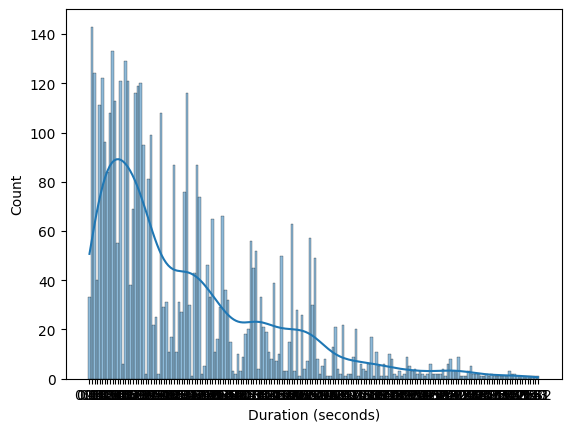

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df2 and the duration column is called "duration"
duration_data = df4["length"]

# Print minimum and maximum duration
print("Minimum duration:", duration_data.min())
print("Maximum duration:", duration_data.max())

# Create histogram with KDE plot
sns.histplot(duration_data, bins=50, kde=True)

# Set x and y axis labels
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")

# Show the plot
plt.show()


In [ ]:
def is_desert(latitude, longitude):
    # Check if the latitude and longitude fall within the range of the Thar Desert
    if latitude >= 24.6 and latitude <= 30.5 and longitude >= 68.7 and longitude <= 75.3:
        return 1
    else:
        return 0

# Apply the is_desert function to the latitude and longitude columns
df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])

df5=df4.drop(['loc','lat','lng'],axis=1)
df5

<ipython-input-65-6c842a43dd23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])


,id,en,file,length,Desert/Non-Desert
7,351852,Lesser Whistling Duck,//www.xeno-canto.org/351852/download,0:43,0
10,95805,Lesser Whistling Duck,//www.xeno-canto.org/95805/download,0:10,0
11,44829,Lesser Whistling Duck,//www.xeno-canto.org/44829/download,0:14,0
13,234153,Lesser Whistling Duck,//www.xeno-canto.org/234153/download,0:10,0
14,212199,Lesser Whistling Duck,//www.xeno-canto.org/212199/download,0:40,0
...,...,...,...,...,...
13269,403275,Little Bunting,//www.xeno-canto.org/403275/download,1:02,0
13270,403273,Little Bunting,//www.xeno-canto.org/403273/download,0:08,0
13271,403271,Little Bunting,//www.xeno-canto.org/403271/download,0:24,0
13273,95783,Red-headed Bunting,//www.xeno-canto.org/95783/download,0:17,0


In [ ]:
df5.isnull().sum()

id                   0
en                   0
file                 0
length               0
Desert/Non-Desert    0
dtype: int64

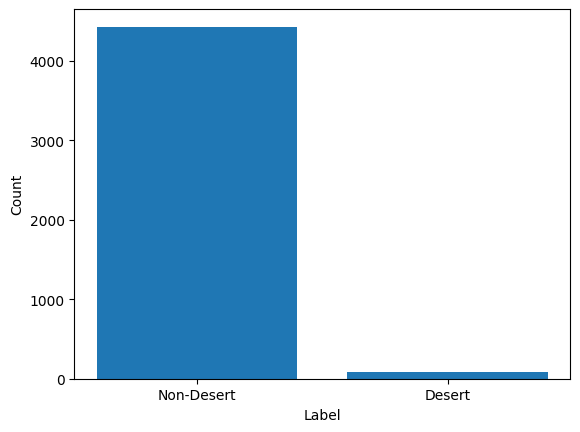

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df5 and the "desert/non desert" column is called "label"
label_counts = df5["Desert/Non-Desert"].value_counts()

# Create bar graph
plt.bar(label_counts.index, label_counts.values)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Count")

# Set x axis tick labels
plt.xticks([0, 1], ["Non-Desert", "Desert"])

# Show the plot
plt.show()


In [ ]:
desert_rows = df5[df5["Desert/Non-Desert"] == 1]
print("Rows with Desert label:\n", desert_rows)

Rows with Desert label:
            id                       en                                  file  \
161    351857           Grey Francolin  //www.xeno-canto.org/351857/download   
178    308183           Grey Francolin  //www.xeno-canto.org/308183/download   
335    104135             Red Spurfowl  //www.xeno-canto.org/104135/download   
533    165857           Indian Peafowl  //www.xeno-canto.org/165857/download   
551    104137           Indian Peafowl  //www.xeno-canto.org/104137/download   
...       ...                      ...                                   ...   
12793  149556  Yellow-throated Sparrow  //www.xeno-canto.org/149556/download   
12867  454322        Indian Silverbill  //www.xeno-canto.org/454322/download   
12868  165245        Indian Silverbill  //www.xeno-canto.org/165245/download   
13261  454321      Grey-necked Bunting  //www.xeno-canto.org/454321/download   
13264  454319       Striolated Bunting  //www.xeno-canto.org/454319/download   

      length  

In [ ]:
bird_names = desert_rows["en"].unique()


bird_counts = {}


for bird in bird_names:
    count = desert_rows[desert_rows["en"] == bird].shape[0]
    bird_counts[bird] = count

for bird, count in bird_counts.items():
    print(f"{bird}: {count}")

Grey Francolin: 2
Red Spurfowl: 1
Indian Peafowl: 2
Steppe Eagle: 1
Shikra: 1
Black Kite: 1
Demoiselle Crane: 8
Black-winged Stilt: 1
Red-wattled Lapwing: 1
Little Stint: 1
Painted Sandgrouse: 2
Rock Dove: 1
Asian Koel: 1
Indian Scops Owl: 1
Savanna Nightjar: 1
Laggar Falcon: 1
White-bellied Minivet: 5
Small Minivet: 1
Great Grey Shrike: 2
White-spotted Fantail: 1
Rufous Treepie: 1
House Crow: 3
Indian Jungle Crow: 2
Northern Raven: 4
Indian Black-lored Tit: 1
Black-crowned Sparrow-Lark: 2
Greater Short-toed Lark: 1
Bimaculated Lark: 1
Red-vented Bulbul: 1
Wire-tailed Swallow: 2
Hume's Leaf Warbler: 3
Sulphur-bellied Warbler: 1
Blyth's Reed Warbler: 1
Graceful Prinia: 1
Common Tailorbird: 1
Large Grey Babbler: 1
Lesser Whitethroat: 3
Eastern Orphean Warbler: 2
Indian Spotted Creeper: 1
Indian Robin: 1
White-browed Bush Chat: 1
Isabelline Wheatear: 1
Brown Rock Chat: 3
Purple Sunbird: 1
Yellow-throated Sparrow: 2
Indian Silverbill: 2
Grey-necked Bunting: 1
Striolated Bunting: 1


# Feature Extraction Functions #

In [ ]:
'''
def extract_features(sound, sr):
    # Extract MFCC features from the sound
    mfcc = librosa.feature.mfcc(sound, sr=sr)

    # Flatten the features for each sound
    flat_mfcc = mfcc.flatten()

    return flat_mfcc
'''




In [ ]:
'''
def load_sound_from_url_mfccs(url):
    # Download the sound to a temporary file
    response = requests.get(url)
    temp_file = tempfile.NamedTemporaryFile(suffix='.mp3')
    temp_file.write(response.content)
    temp_file.seek(0)

    # Load the sound using librosa
    y, sr = librosa.load(temp_file.name, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    return mfccs
'''

In [ ]:
'''
pref='https:'
def load_sound_from_url(url):
    # Download the sound to a temporary file
    response = requests.get(url)
    temp_file = tempfile.NamedTemporaryFile(suffix='.mp3')
    temp_file.write(response.content)
    temp_file.seek(0)

    # Load the sound using librosa
    y, sr = librosa.load(temp_file.name, sr=None)

    # Remove any background noise from the sound
    y = librosa.effects.harmonic(y)

    return y, sr

'''

In [ ]:
'''
def load_mfccs_from_file(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=22050, mono=True)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    return mfcc
    '''

In [ ]:
'''
mfccs = []
for index, url in df6['file'][:10].iteritems():
    file_name = f"{index}.mp3"
    file_path = os.path.join(data_dir, file_name)
    mfcc = load_mfccs_from_file(file_path)
    mfcc_norm = StandardScaler().fit_transform(mfcc)
    print(mfcc_norm.shape)
    mfccs.append(mfcc_norm)
    '''

In [ ]:
'''
def extract_spectrogram_stft(audio_signal):
    stft = np.abs(librosa.stft(audio_signal))
    spectrogram = np.log(stft**2)
    return spectrogram

'''

In [ ]:
'''
def extract_spectrogram(signal, sample_rate=22050, n_mels=128, n_fft=2048, hop_length=512):
    # Compute mel spectrogram using librosa
    spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)

    # Convert to decibels
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Get the frequency values and energy in each frequency bin
    freqs = librosa.core.mel_frequencies(n_mels=n_mels, fmin=0, fmax=sample_rate/2)
    energy = np.mean(spectrogram_db, axis=1)

    return energy, freqs
    '''

In [ ]:
'''
def extract_patches(signal, sr, patch_size, n_mels, n_fft, hop_length):
# Compute the Mel spectrogram
    S = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    # Convert the power spectrogram to decibels
    log_S = librosa.power_to_db(S, ref=np.max)

    # Compute the number of patches
    num_patches = int(np.ceil(log_S.shape[1] / patch_size))

    # Pad the spectrogram with zeros if necessary
    padded_log_S = np.pad(log_S, ((0, 0), (0, num_patches * patch_size - log_S.shape[1])), mode='constant')

    # Reshape the padded spectrogram into patches
    patches = np.reshape(padded_log_S, (n_mels, num_patches, patch_size))

    # Transpose the patches to match the format expected by Keras (batch_size, height, width, channels)
    patches = np.transpose(patches, (1, 0, 2))
    patches = np.expand_dims(patches, axis=-1)

    return patches
    '''

In [ ]:
'''
# Define a function to extract the Mel spectrogram patches from an audio signal using sliding window
def extract_patches_sliding(signal, sr, patch_size, n_mels, n_fft, hop_length):
    # Compute the Mel spectrogram
    S = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)

    # Convert the power spectrogram to decibels
    log_S = librosa.power_to_db(S, ref=np.max)

    # Compute the number of patches
    num_patches = int(np.ceil((log_S.shape[1] - patch_size) / patch_size)) + 1

    # Extract patches using sliding window
    patches = []
    for i in range(num_patches):
        patch_start = i * patch_size
        patch_end = patch_start + patch_size
        patch = log_S[:, patch_start:patch_end]
        patches.append(patch)

    # Convert list of patches to numpy array
    patches = np.asarray(patches)

    # Reshape the patches to match the format expected by Keras (batch_size, height, width, channels)
    patches = np.expand_dims(patches, axis=-1)

    return patches
'''

#Comparison functions #

In [ ]:

'''
The compare_spectrograms_energy function calculates the similarity score based on the energy values in a window around the highest energy frequency bin in the spectrograms of two signals.

First, it extracts the spectrograms for both signals using the extract_spectrogram function. Then it finds the highest energy frequency bin in both spectrograms using the argmax function.

Next, it defines a window around the highest energy frequency bin using the arange function. The size of the window is determined by the window_size parameter, which specifies the number of bins to include on either side of the highest energy frequency bin.

The similarity score is then computed as the mean of the product of the energy values in the window for the two spectrograms.

To normalize the similarity score to lie between 0 and 1, the function calculates the maximum possible similarity score based on the energy values in the window, using the root-mean-square of the energy values. It then divides the computed similarity score by this maximum score.

Finally, the function converts the similarity score to a percentage by multiplying it by 100.
'''
'''
def compare_spectrograms_energy(signal1, signal2, sample_rate=22050, n_mels=1280, n_fft=2048, hop_length=512, window_size=400):
    # Extract spectrograms for both signals
    energy1, freqs1 = extract_spectrogram(signal1, sample_rate, n_mels, n_fft, hop_length)
    energy2, freqs2 = extract_spectrogram(signal2, sample_rate, n_mels, n_fft, hop_length)

    # Find the highest energy frequency bin in both spectrograms
    highest_energy_bin1 = np.argmax(energy1)
    highest_energy_bin2 = np.argmax(energy2)

    # Define the window around the highest energy frequency bin
    freq_window = np.arange(highest_energy_bin1-window_size, highest_energy_bin1+window_size+1)

    # Compute the similarity score based on energy values in the window
    similarity_score = np.mean(energy1[freq_window] * energy2[freq_window])

    # Normalize the similarity score to lie between 0 and 1
    max_similarity_score = np.mean(energy1[freq_window] ** 2) ** 0.5 * np.mean(energy2[freq_window] ** 2) ** 0.5
    similarity_score_normalized = similarity_score / max_similarity_score

    # Convert similarity score to percentage
    similarity_score_percentage = similarity_score_normalized * 100

    return similarity_score_percentage

'''


In [ ]:
'''
def compare_highest_energy_bands_cos(signal1, signal2, sample_rate=22050, n_mels=128, n_fft=2048, hop_length=512, window_size=3):
    # Extract spectrograms for both signals
    energy1, freqs1 = extract_spectrogram(signal1, sample_rate, n_mels, n_fft, hop_length)
    energy2, freqs2 = extract_spectrogram(signal2, sample_rate, n_mels, n_fft, hop_length)

    # Find the highest energy frequency bin in both spectrograms
    highest_energy_bin1 = np.argmax(energy1)
    highest_energy_bin2 = np.argmax(energy2)

    # Define the frequency bands around the highest energy bins
    band_width = 2*window_size + 1
    band1_start = max(0, highest_energy_bin1 - window_size)
    band1_end = min(len(freqs1)-1, highest_energy_bin1 + window_size)
    band2_start = max(0, highest_energy_bin2 - window_size)
    band2_end = min(len(freqs2)-1, highest_energy_bin2 + window_size)

    # Ensure that the bands have the same size
    num_bins1 = band1_end - band1_start + 1
    num_bins2 = band2_end - band2_start + 1
    if num_bins1 > num_bins2:
        band1_start += (num_bins1 - num_bins2) // 2
        band1_end = band1_start + num_bins2 - 1
    else:
        band2_start += (num_bins2 - num_bins1) // 2
        band2_end = band2_start + num_bins1 - 1

    # Extract data from the frequency bands
    band_energy1 = energy1[band1_start:band1_end+1]
    band_energy2 = energy2[band2_start:band2_end+1]

    # Normalize the frequency bands
    norm_band_energy1 = (band_energy1 - np.mean(band_energy1)) / np.std(band_energy1)
    norm_band_energy2 = (band_energy2 - np.mean(band_energy2)) / np.std(band_energy2)

    # Compute the cosine similarity between the normalized frequency bands
    norm_band_energy = np.concatenate((norm_band_energy1.reshape(1,-1), norm_band_energy2.reshape(1,-1)), axis=0)
    similarity_score = cosine_similarity(norm_band_energy.T)[0, 1]

    return similarity_score * 100
'''

In [ ]:
'''
from scipy.fft import fft
def compare_highest_energy_bands_cos2(signal1, signal2, overlap=0.5):
    # Calculate window size based on length of signals and desired overlap
    window_size = int(np.ceil((1 + overlap) * min(len(signal1), len(signal2))))

    # Calculate the number of overlapping samples
    overlap_size = int(np.ceil(overlap * window_size))

    # Pad signals with zeros if necessary to ensure they have equal length
    if len(signal1) < len(signal2):
        signal1 = np.concatenate((signal1, np.zeros(len(signal2) - len(signal1))))
    elif len(signal2) < len(signal1):
        signal2 = np.concatenate((signal2, np.zeros(len(signal1) - len(signal2))))

    # Calculate the number of windows
    num_windows = int(np.ceil(len(signal1) / window_size))

    # Initialize list to store maximum energy band cosine similarities
    max_similarities = []

    # Loop over windows and calculate cosine similarity of highest energy band
    for i in range(num_windows):
        # Get window of signal1
        start1 = i * overlap_size
        end1 = start1 + window_size
        window1 = signal1[start1:end1]

        # Get window of signal2
        start2 = i * overlap_size
        end2 = start2 + window_size
        window2 = signal2[start2:end2]

        # Calculate FFTs of windows
        fft1 = fft(window1)
        fft2 = fft(window2)

        # Calculate energy bands
        freqs = np.fft.fftfreq(window_size, d=1/44100)
        energy_bands = np.split(np.abs(fft1)**2, [500, 1000, 2000, 4000, len(freqs)])

        # Calculate cosine similarity of highest energy band
        cos_sim = np.dot(energy_bands[-1], np.abs(fft2)**2) / (np.linalg.norm(energy_bands[-1]) * np.linalg.norm(np.abs(fft2)**2))
        max_similarities.append(cos_sim)

    # Return maximum cosine similarity
    return max(max_similarities)
    '''


In [ ]:
'''
from scipy.fft import fft
def compare_highest_energy_bands_cos2(signal1, signal2, overlap=0.5):
    # Calculate window size based on length of signals and desired overlap
    window_size = int(np.ceil((1 + overlap) * min(len(signal1), len(signal2))))

    # Calculate the number of overlapping samples
    overlap_size = int(np.ceil(overlap * window_size))

    # Pad signals with zeros if necessary to ensure they have equal length
    if len(signal1) < len(signal2):
        signal1 = np.concatenate((signal1, np.zeros(len(signal2) - len(signal1))))
    elif len(signal2) < len(signal1):
        signal2 = np.concatenate((signal2, np.zeros(len(signal1) - len(signal2))))

    # Calculate the number of windows
    num_windows = int(np.ceil(len(signal1) / window_size))

    # Initialize list to store maximum energy band cosine similarities
    max_similarities = []

    # Loop over windows and calculate cosine similarity of highest energy band
    for i in range(num_windows):
        # Get window of signal1
        start1 = i * overlap_size
        end1 = start1 + window_size
        window1 = signal1[start1:end1]

        # Get window of signal2
        start2 = i * overlap_size
        end2 = start2 + window_size
        window2 = signal2[start2:end2]

        # Calculate FFTs of windows
        fft1 = fft(window1)
        fft2 = fft(window2)

        # Calculate energy bands
        freqs = np.fft.fftfreq(window_size, d=1/44100)
        energy_bands = np.split(np.abs(fft1)**2, [500, 1000, 2000, 4000, len(freqs)])

        # Calculate cosine similarity of highest energy band
        cos_sim = np.dot(energy_bands[-1], np.abs(fft2)**2) / (np.linalg.norm(energy_bands[-1]) * np.linalg.norm(np.abs(fft2)**2))
        max_similarities.append(cos_sim)

    # Return maximum cosine similarity
    return max(max_similarities)
    '''

In [ ]:
'''
def compare_birdcalls_dtw(url1, url2, sr=22050):
    # Load signals and resample to a consistent sample rate
    signal1, sr1 = load_sound_from_url(url1)
    signal2, sr2 = load_sound_from_url(url2)
    signal1 = librosa.resample(signal1, sr1, sr)
    signal2 = librosa.resample(signal2, sr2, sr)

    # Remove noise from signals using spectral subtraction
    signal1 = librosa.decompose.nn_filter(signal1, sr=sr, aggregate=np.median, metric='cosine', width=int(sr*0.04), n_fft=int(sr*0.1))
    signal2 = librosa.decompose.nn_filter(signal2, sr=sr, aggregate=np.median, metric='cosine', width=int(sr*0.04), n_fft=int(sr*0.1))

    # Calculate Mel spectrograms for signals
    mel_spec1 = librosa.feature.melspectrogram(signal1, sr=sr, n_mels=128, fmax=8000)
    mel_spec2 = librosa.feature.melspectrogram(signal2, sr=sr, n_mels=128, fmax=8000)

    # Convert Mel spectrograms to log scale
    log_mel_spec1 = librosa.amplitude_to_db(mel_spec1)
    log_mel_spec2 = librosa.amplitude_to_db(mel_spec2)

    # Calculate dynamic time warping distance between Mel spectrograms
    dtw_dist, _ = librosa.sequence.dtw(log_mel_spec1.T, log_mel_spec2.T)

    # Normalize DTW distance by length of Mel spectrograms
    norm_dtw_dist = dtw_dist / (log_mel_spec1.shape[1] + log_mel_spec2.shape[1])

    # Return similarity score (1 - normalized DTW distance)
    return 1 - norm_dtw_dist
    '''

In [ ]:
'''
from fastdtw import dtw


def compare_audio_dtw(y1, y2, sr=22050, n_mfcc=100):
    # Extract MFCCs for each audio signal
    mfcc1 = librosa.feature.mfcc(y=y1, sr=sr, n_mfcc=n_mfcc)
    mfcc2 = librosa.feature.mfcc(y=y2, sr=sr, n_mfcc=n_mfcc)

    # Compute DTW distance between the two sequences of MFCCs
    dtw_distance, _ = dtw(mfcc1.T, mfcc2.T)
    #print(dtw_distance)
    # Convert DTW distance to similarity score
    similarity_score = 1.0 / (1.0 + dtw_distance)
    return similarity_score
    '''

In [ ]:
'''
from sklearn.metrics.pairwise import cosine_similarity


def compare_spectrograms_cos(signal1, signal2, sample_rate=22050, n_mels=128, n_fft=2048, hop_length=512, window_size=3):
    # Extract spectrograms for both signals
    energy1, freqs1 = extract_spectrogram(signal1, sample_rate, n_mels, n_fft, hop_length)
    energy2, freqs2 = extract_spectrogram(signal2, sample_rate, n_mels, n_fft, hop_length)

    # Find the highest energy frequency bin in both spectrograms
    highest_energy_bin1 = np.argmax(energy1)
    highest_energy_bin2 = np.argmax(energy2)

    # Define the window around the highest energy frequency bin
    freq_window = np.arange(highest_energy_bin1-window_size, highest_energy_bin1+window_size+1)

    # Compute the cosine similarity between the spectrograms in the frequency window
    spectrogram1 = energy1.reshape(-1, 1)
    spectrogram2 = energy2.reshape(-1, 1)
    similarity_score = cosine_similarity(spectrogram1[freq_window], spectrogram2[freq_window])[0][0]

    return similarity_score * 100
    '''

In [ ]:
'''
def compare_spectrograms_cos2(signal1, signal2, sample_rate=22050, n_mels=128, n_fft=2048, hop_length=512, bandwidth=4):
    # Extract spectrograms for both signals
    spectrogram1 = extract_spectrogram(signal1, sample_rate, n_mels, n_fft, hop_length)
    spectrogram2 = extract_spectrogram(signal2, sample_rate, n_mels, n_fft, hop_length)

    # Find the frequency bin with the highest energy for each signal
    highest_energy_bin1 = np.argmax(np.mean(spectrogram1, axis=1))
    highest_energy_bin2 = np.argmax(np.mean(spectrogram2, axis=1))

    # Define the frequency range for the comparison window based on the highest energy frequency bins and the specified bandwidth
    min_bin = min(highest_energy_bin1, highest_energy_bin2)
    max_bin = max(highest_energy_bin1, highest_energy_bin2)
    freq_window = np.arange(max(min_bin - bandwidth, 0), min(max_bin + bandwidth + 1, spectrogram1.shape[0]))

    # Compute the cosine similarity between the spectrograms in the frequency window
    similarity_score = cosine_similarity(spectrogram1[freq_window].reshape(1, -1), spectrogram2[freq_window].reshape(1, -1))[0][0]

    return similarity_score * 100

'''

In [ ]:
'''
def compare_spectrogram(spectrogram1, spectrogram2):
    # Get the shape of both spectrograms
    rows1, columns1 = spectrogram1.shape
    rows2, columns2 = spectrogram2.shape

    # Find the maximum number of columns
    max_columns = max(columns1, columns2)

    # Pad the smaller spectrogram with zeros to match the number of columns of the larger spectrogram
    if columns1 <= max_columns:
        spectrogram1 = np.pad(spectrogram1, ((0,0), (0, max_columns-columns1)), mode='constant')
        spectrogram2 = np.pad(spectrogram2, ((0,0), (0, max_columns-columns2)), mode='constant')
    elif columns2 < max_columns:
        spectrogram2 = np.pad(spectrogram2, ((0,0), (0, max_columns-columns2)), mode='constant')
        spectrogram1 = np.pad(spectrogram1, ((0,0), (0, max_columns-columns1)), mode='constant')
    spectrogram1f=spectrogram1.flatten()
    spectrogram2f=spectrogram2.flatten()
    # Calculate the cosine similarity score
    cosine_similarity = np.dot(spectrogram1f, spectrogram2f)/(np.linalg.norm(spectrogram1f)*np.linalg.norm(spectrogram2f))
    return cosine_similarity
    '''

In [ ]:
'''
def extract_spectrogram(audio_signal):
    stft = np.abs(librosa.stft(audio_signal))
    spectrogram = np.log(stft**2)
    return spectrogram
    '''

In [ ]:
'''
def compare_spectrogram_pad(spectrogram1, spectrogram2):
    # Get the shape of both spectrograms
    rows1, columns1 = spectrogram1.shape
    rows2, columns2 = spectrogram2.shape

    # Find the maximum number of columns
    max_columns = max(columns1, columns2)

    # Pad the smaller spectrogram with zeros to match the number of columns of the larger spectrogram
    if columns1 <= max_columns:
        spectrogram1 = np.pad(spectrogram1, ((0,0), (0, max_columns-columns1)), mode='constant')
        spectrogram2 = np.pad(spectrogram2, ((0,0), (0, max_columns-columns2)), mode='constant')
    elif columns2 < max_columns:
        spectrogram2 = np.pad(spectrogram2, ((0,0), (0, max_columns-columns2)), mode='constant')
        spectrogram1 = np.pad(spectrogram1, ((0,0), (0, max_columns-columns1)), mode='constant')
    spectrogram1f=spectrogram1.flatten()
    spectrogram2f=spectrogram2.flatten()
    # Calculate the cosine similarity score
    cosine_similarity = np.dot(spectrogram1f, spectrogram2f)/(np.linalg.norm(spectrogram1f)*np.linalg.norm(spectrogram2f))
    return cosine_similarity
    '''

In [ ]:
'''
def compare_highest_energy_freq_bands_cos(signal1, signal2, sample_rate=22050, n_mels=128, n_fft=2048, hop_length=512, window_size=3):
    # Extract spectrograms for both signals
    energy1, freqs1 = extract_spectrogram(signal1, sample_rate, n_mels, n_fft, hop_length)
    energy2, freqs2 = extract_spectrogram(signal2, sample_rate, n_mels, n_fft, hop_length)

    # Find the highest energy frequency bin in both spectrograms
    highest_energy_bin1 = np.argmax(energy1)
    highest_energy_bin2 = np.argmax(energy2)

    # Define the frequency bands around the highest energy bins
    band_width = 2*window_size + 1
    band1_start = max(0, highest_energy_bin1 - window_size)
    band1_end = min(len(freqs1)-1, highest_energy_bin1 + window_size)
    band2_start = max(0, highest_energy_bin2 - window_size)
    band2_end = min(len(freqs2)-1, highest_energy_bin2 + window_size)

    # Ensure that the bands have the same size
    num_bins1 = band1_end - band1_start + 1
    num_bins2 = band2_end - band2_start + 1
    if num_bins1 > num_bins2:
        band1_start += (num_bins1 - num_bins2) // 2
        band1_end = band1_start + num_bins2 - 1
    else:
        band2_start += (num_bins2 - num_bins1) // 2
        band2_end = band2_start + num_bins1 - 1

    # Extract data from the frequency bands
    band_energy1 = energy1[band1_start:band1_end+1]
    band_energy2 = energy2[band2_start:band2_end+1]
    band_freqs1 = freqs1[band1_start:band1_end+1]
    band_freqs2 = freqs2[band2_start:band2_end+1]

    # Normalize the frequency bands
    norm_band_energy1 = (band_energy1 - np.mean(band_energy1)) / np.std(band_energy1)
    norm_band_energy2 = (band_energy2 - np.mean(band_energy2)) / np.std(band_energy2)
    norm_band_freqs1 = (band_freqs1 - np.mean(band_freqs1)) / np.std(band_freqs1)
    norm_band_freqs2 = (band_freqs2 - np.mean(band_freqs2)) / np.std(band_freqs2)

    # Concatenate the normalized frequency and energy arrays
    norm_band_data1 = np.concatenate((norm_band_freqs1.reshape(1,-1), norm_band_energy1.reshape(1,-1)), axis=0)
    norm_band_data2 = np.concatenate((norm_band_freqs2.reshape(1,-1), norm_band_energy2.reshape(1,-1)), axis=0)

    # Compute the cosine similarity between the normalized frequency and energy arrays
    similarity_score = cosine_similarity(norm_band_data1.T, norm_band_data2.T)[0, 1]

    return similarity_score * 100
'''

In [ ]:
'''
def remove_outliers(similarity_scores):
  median_score = np.median(similarity_scores)
  q1, q3 = np.percentile(similarity_scores, [25, 75])
  iqr = q3 - q1

  # Calculate the upper and lower bounds for outliers
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # Remove outliers from the similarity scores array
  filtered_scores = [score for score in similarity_scores if score >= lower_bound and score <= upper_bound]
  return filtered_scores
  '''

#plotting function#

In [ ]:
'''
import matplotlib.pyplot as plt

def plot_spectrogram(spect):

    energy, freqs = spect

    # Plot energy vs frequency
    plt.figure(figsize=(10, 4))
    plt.plot(freqs, energy)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Energy')
    plt.title('Spectrogram')
    plt.show()
'''

#Overall similarity running function#

In [ ]:
'''


def scorer_energy(batch):
    # Create a dictionary to store the mean similarity scores for each bird species
    species_scores = {}
    across_means=[]
    d_means=[]
    nd_means=[]
    # Loop over each unique bird species in the data
    print('Using Energy similarity ')
    for species in batch:
        print(f'For species {species}')
        # Separate the sounds for the current species into desert and non-desert regions
        species_sounds = data[data['en'] == species]['file']
        species_regions = data[data['en'] == species]['Desert/Non-Desert']

        desert_sounds = [s for s, region in zip(species_sounds, species_regions) if region == 1]
        non_desert_sounds = [s for s, region in zip(species_sounds, species_regions) if region == 0]
        print(f'number of desert sounds  { len(desert_sounds)}')
        print(f'number of non - desert sounds  { len(non_desert_sounds)}')
        if len(desert_sounds)<3 or len(non_desert_sounds)<5:
            continue
        desert_signals = []
        non_desert_signals = []

        # Extract the spectrogram for each sound in the desert and non-desert regions
        for desert_sound in desert_sounds:
            audio_signal, sr = load_sound_from_url(pref+desert_sound)
            desert_signals.append(audio_signal)

        for non_desert_sound in non_desert_sounds:
            audio_signal, sr = load_sound_from_url(pref+non_desert_sound)
            non_desert_signals.append(audio_signal)

        # Calculate the mean similarity score between the desert and non-desert spectrograms
        #print(desert_signals)
        #print(non_desert_signals)
        similarity_scores = [compare_highest_energy_bands_cos(d, n) for d in desert_signals for n in non_desert_signals]
        desert_scores = [compare_highest_energy_bands_cos(d, n) for d in desert_signals for n in desert_signals]
        nd_scores = [compare_highest_energy_bands_cos(d, n) for d in non_desert_signals for n in non_desert_signals]

        print(similarity_scores)
        print(desert_scores)
        print(nd_scores)
        d_mean=np.nanmean(desert_scores)
        d_means.append(d_mean)

        #var=np.nanvar(similarity_scores)
        nd_mean=np.nanmean(nd_scores)
        nd_means.append(nd_scores)
        #var=np.nanvar(similarity_scores)
        print(f'Similarity in within desert region is {d_mean} ' )
        print(f'Similarty within non_deserts is {nd_mean}' )

        meanss=np.nanmean(similarity_scores)
        var=np.nanvar(similarity_scores)
        across_means.append(meanss)
        print(f' the similarity score across is {meanss} and variance is {var}')

'''